# Lab 5

This lab consists:
* Understanding and implementing the linear perceptron
* Transforming your data to get a non-linear decision boundary
* Understanding and implementating polynomial kernel perceptrons for non-linear decision boundaries



## For fun: The First Perceptron

![Mark I Perceptron](https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg)

From Wikipedia: Mark I Perceptron machine, the first implementation of the perceptron algorithm. It was connected to a camera with 20×20 cadmium sulfide photocells to make a 400-pixel image. The main visible feature is a patch panel that set different combinations of input features. To the right, arrays of potentiometers that implemented the adaptive weights

## The Perceptron 

We have studied that given a model and a cost function, we learn the parameters of the model by using stochastic gradient descent. This consists in iteratively modifying the parameters by looping on the examples $\left(x, y\right)$ and by adding a gradient term.

### Perceptron Algorithm

The perceptron algorithm is a stochastic learning algorithm that iteratively improves a model by running it on training samples, then updating the model whenever it finds it has made an incorrect classification. The model learned by the standard perceptron algorithm is a linear classifier: a vector of weights $\mathbf{w}$ that is used to classify a sample vector $\mathbf{x}$ as class $1$ or class $-1$ according to

$${{\hat {y}}=\operatorname {sgn} (\mathbf {w} ^{\top }\mathbf {x} )}$$
where a zero is mapped to minus one. (The "hat" on $\hat{y}$ denotes an estimated value.)

In pseudocode, the perceptron algorithm is given by:

* Initialize $\mathbf{w}$ to an all-zero vector of length $p$, the number of predictors (features).
* For some fixed number of iterations, or until some stopping criterion is met:
    - For each training example $\mathbf{x}_i$ with ground truth label $y_i ∈ \{-1, 1\}$:

    Let, $\hat{y} = sgn(\mathbf{w}^T \mathbf{x}_i)$
    
    If $ \hat{y} \neq y_i$, $\mathbf{w} := \mathbf{w} + y_i \mathbf{x}_i$

## Data Loading

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [3]:
! rm cercle.txt ellipse.txt
! wget https://www.dropbox.com/s/chfkj30rlnez38o/cercle.txt
! wget https://www.dropbox.com/s/u0jxsd8a0iuiqgx/ellipse.txt

rm: cannot remove 'cercle.txt': No such file or directory
rm: cannot remove 'ellipse.txt': No such file or directory
--2022-11-01 22:02:19--  https://www.dropbox.com/s/chfkj30rlnez38o/cercle.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/chfkj30rlnez38o/cercle.txt [following]
--2022-11-01 22:02:20--  https://www.dropbox.com/s/raw/chfkj30rlnez38o/cercle.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7bbd2b42e6d6ef923f77be776.dl.dropboxusercontent.com/cd/0/inline/Bv8lP6FvSzzozU9V3A8KUeCvODciveOEpluBBnI4lYZJFox8iftKGiiKl5fEIHe8LW0x4g5FNo6tXrjan-uJvixjJmS4yTNHGG9zg2QoY8hiJa0CmQgf9irLRFVshdK6gqbaYAixHFjIe0CkMy4MLt30-gcog7xwcQSMKAznSs4hlQ/file# [following]
--2022-11-01 22:02:20--  https://ucd7bbd2b42e6d6ef923f77be776.dl.dropboxusercontent.com/cd/0/inli

In [4]:
# We start by loading the dataset

data = np.loadtxt('cercle.txt')
# data = np.loadtxt('ellipse.txt')

# There are only 2 dimensions...
train_cols = [0, 1]

# Number of classes
n_classes = 2
# Number of training points
n_train = 1500

# Uncomment to get non-deterministic results 
random.seed(3395)

# Randomly select indices for the training and test set
inds = np.arange(data.shape[0])
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Separate the dataset into two sets: training and test.
# Keep the rows train_inds for training
train_data = data[train_inds]
train_inputs = train_data[:, train_cols]
train_labels = train_data[:, -1]

# Keep the rows test_inds for testing
test_data = data[test_inds]
test_inputs = test_data[:, train_cols]
test_labels = test_data[:, -1]

# Plot the decision boundary
def plot(model, train_pred, test_pred):
    plt.scatter(train_inputs[:, 0], train_inputs[:, 1], c=train_pred)
    plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=test_pred)
    plt.title('Prediction')
    plt.show()

    plt.scatter(train_inputs[:, 0], train_inputs[:, 1], c=np.sign(train_labels))
    plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=test_labels)
    plt.title('True labels')
    plt.show()

In [8]:
test_data.shape

(500, 3)

## Linear Perceptron

**Exercise: implement this Perceptron**

In [13]:
class Perceptron:
    def __init__(self):
        return

    def train(self, train_data, train_label):
        n_example = train_data.shape[0]            
        self.weights = np.random.random(train_data.shape[1])

        i = 0
        count = 0 # We stop when the set is linearly separated
        n_iter = 0
        n_iter_max = n_example * 100
        while (count < n_example and n_iter < n_iter_max):
            if (np.dot(train_data[i], self.weights)) * train_label[i] < 0:
                self.weights += train_label[i] * train_data[i]
                count = 0
            else:
                count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_outputs(self, test_data):
        outputs = []
        for data in test_data:
            outputs.append(np.dot(data, self.weights))
        return outputs

We will train a Linear perceptron on  1500  training examples
The test error is  47.199999999999996 %


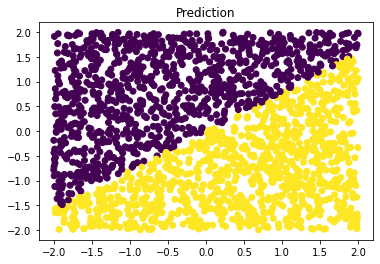

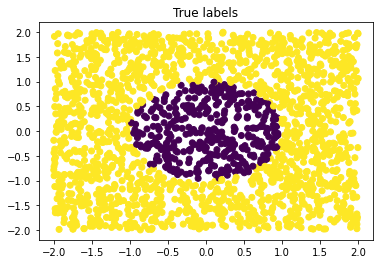

In [14]:
print("We will train a Linear perceptron on ", n_train, " training examples")

# Create and train the model
model = Perceptron()
model.train(train_inputs, train_labels)

# Obtain the ouputs on the test set.
test_outputs = model.compute_outputs(test_inputs)

# Convert the outputs into classes by taking the sign.
test_pred = np.sign(test_outputs)

# Measure the performance
err = 1.0 - np.mean(test_labels == test_pred)
print("The test error is ", 100.0 * err,"%")

# Get the train set predictions for plotting
train_pred = np.sign(model.compute_outputs(train_inputs))

# Decision boundary
plot(model, train_pred, test_pred)

## Non-Linear Perceptron
Our linear perceptron can't correctly capture the circle decision boundary!

To make it work, we will first apply a transformation on the dataset before training. The algorithm will then uniquely work with the transformed data. To keep things simple at first, we will simply implement a transformation consisting of a degree two polynomial. And to make it even more simple, the circle and ellipse datasets are only in 2-d...

$$\phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$$

$$\phi(x_1, x_2) = \left(1,x_1,x_2,x_1^2,x_2^2,x_1x_2\right)$$

**Exercise: implement this transformation in the polynomial function below:**

In [9]:
# Takes a matrix of data examples x (n datapoints, input space dimension) as input (without labels) and returns the transformed
# matrix (n datapoints, projected space dimension)
def polynomial(X):
    Y = np.zeros((X.shape[0], 6))
    Y[:, 0] = 1.
    # Please fill in the code below
    Y[:, 1] = ...
    Y[:, 2] = ...
    Y[:, 3] = ...
    Y[:, 4] = ...
    Y[:, 5] = ...
    return Y

In [ ]:
print("We will train a Perceptron on ", n_train, " transformed training examples")

# Transform the dataset
transformed_train_inputs = polynomial(train_inputs)
transformed_test_inputs = polynomial(test_inputs)

# Create and train the model
model = Perceptron()
model.train(transformed_train_inputs, train_labels)

# Obtain the ouputs on the test set.
test_outputs = model.compute_outputs(transformed_test_inputs)

# Convert the outputs into classes by taking the sign.
test_pred = np.sign(test_outputs)

# Measure the performance
err = 1.0 - np.mean(test_labels==test_pred)
print("The test error is ", 100.0 * err,"%")

# Decision boundary
train_pred = np.sign(model.compute_outputs(transformed_train_inputs))
plot(model, train_pred, test_pred)

## Kernel trick

Transforming all of our data points is very expensive! What if we wanted a space that had 100 dimensions instead of 6? Or maybe even infinitely many dimensions? Transforming the dataset wouldn't be feasible. So what if we didn't need to transform them at all? 

### Kernel methods

A *kernel machine* is a classifier that stores a subset of its training examples $\mathbf{x}_i$, associates with each a weight $α_i$, and makes decisions for new samples $\mathbf{x}'$ by evaluating

$${\operatorname{sgn} \sum _{i=1}^N\alpha _{i}y_{i}K(\mathbf {x} _{i},\mathbf {x'} )}$$

Here, $K$ is some kernel function. Formally, a kernel function is a non-negative semidefinite kernel, representing an inner product between samples in a high-dimensional space, as if the samples had been expanded to include additional features by a function $\phi: K(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x})^T \phi(\mathbf{x}')$. Intuitively, it can be thought of as a similarity function between samples.

### Kernel Perceptron Theory

To derive the kernel perceptron algorithm, we must first formulate it in dual form, starting from the observation that the weight vector $\mathbf{w}$ can be expressed as a linear combination of the $n$ training samples. The equation for the weight vector is
$$\mathbf{w} =\sum _{i}^{n}\alpha _{i}y_{i}\mathbf {x} _{i}$$
where $\alpha_i$ is the number of times $\mathbf{x}_i$ was misclassified, forcing an update $\mathbf{w} := \mathbf{w} + y_i x_i$. Using this result, we can formulate the dual perceptron algorithm, which loops through the samples as before, making predictions, but instead of storing and updating a weight vector $\mathbf{w}$, it updates a *mistake counter* vector $\mathbf{\alpha}$. We must also rewrite the prediction formula to get rid of $\mathbf{w}$:

$${\begin{aligned}{\hat{y}}&=\operatorname {sgn}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} )\\&=\operatorname {sgn} \left(\sum _{i}^{n}\alpha _{i}y_{i}\mathbf {x} _{i}\right)^{\mathsf {T}}\mathbf {x} \\&=\operatorname {sgn} \sum _{i}^{n}\alpha _{i}y_{i}(\mathbf {x} _{i}\cdot \mathbf {x} )\end{aligned}}$$


Plugging these two equations into the training loop turn it into the dual perceptron algorithm.

Finally, we can replace the dot product in the dual perceptron by an arbitrary kernel function, to get the effect of a feature map $\phi$ without computing $\phi(x)$ explicitly for any samples. Doing this yields the kernel perceptron algorithm:

* Initialize $\alpha$ to an all-zeros vector of length $n$, the number of training samples.
* For some fixed number of iterations, or until some stopping criterion is met:
    For each training example $x_j$, $y_j$:
    Let $${\hat{y}}=\operatorname {sgn} \sum _{i}^{n}\alpha _{i}y_{i}K(\mathbf {x} _{i},\mathbf {x} _{j})$$
    If $\hat{y} \neq y_j$, perform an update by incrementing the mistake counter:
    $$\alpha_j := \alpha_j + 1$$

## Polynomial Kernel

Your objective for this section is to implement a polynomial kernel perceptron. We will ask you to use a polynomial kernel for this problem. For a review, please refer to the [course document](https://piazza.com/class_profile/get_resource/kdukq17hvta3o/kfyzfx0zlmo65w), especially the second part.

**Exercise: implement a polynomial kernel function of arbitrary degree**

In [ ]:
def kernel_polynomial(x, y, deg=2):
    # https://en.wikipedia.org/wiki/Polynomial_kernel
    return ...

kernel_polynomial(np.array([0,1]), np.array([[0,1],[1,0]]))

## Kernel Perceptron

Now, we will implement the kernel perceptron.

**Exercise: Complete the code below for the kernel perceptron algorithmn**

Hint: Reuse the perceptron code above, but rather than learning the vector $w$ directly, you need to rewrite $\mathbf{w} = \sum_i \alpha_i \mathbf{x}_i$ and to learn the coefficients $a_i$. Then, we replace $\mathbf{w}^T x$ by $\left(\sum_i \alpha_i \mathbf{x}_i\right)^T x$ and apply the kernel trick.

In [ ]:
class KernelPerceptron:
    def __init__(self, kernel_fn):
        self.kernel_fn = kernel_fn

    def train(self, train_data, train_labels):
        n_example = train_data.shape[0]

        self.train_x = train_data
        self.train_y = train_labels

        # alpha initialisation
        self.a = np.zeros(n_example)

        # Gram matrix
        K = np.zeros((n_example, n_example))
        for i in range(n_example):
            K[i] = self.kernel_fn(self.train_x[i], self.train_x)

        # Kernel calculation
        i = 0
        count = 0
        n_iter = 0
        n_iter_max = n_example * 100
        while (count < n_example and n_iter < n_iter_max):
            # Please write the following code
            if ...:
                ...
                count = 0
            else:
                count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_outputs(self, test_data):
        outputs = []
        for i in range(len(test_data)):
            # Please write the following code
            prediction = ...
            outputs.append(prediction)
        return outputs

In [ ]:
print("We will learn a kernel perceptron on ", n_train, " training examples")

model = KernelPerceptron(kernel_polynomial)
model.train(train_inputs, train_labels)

test_pred = np.sign(model.compute_outputs(test_inputs))
err = 1.0 - np.mean(test_labels==test_pred)
print("The test error is {}%".format(100.0 * err))

train_pred = np.sign(model.compute_outputs(train_inputs))

plot(model, train_pred, test_pred)

## More Experiments!

Another popular kernel is the **R**adial **B**asis **F**unction kernel ([RBF or gaussian kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)).


**Exercise: implement the RBF kernel**

In [ ]:
def kernel_rbf(x, y, sigma=1):
    return ...

**Exercise: Run both the RBF kernel perceptron on the cercle dataset.**
1. See what happens to the rbf kernel as you change sigma (try changing to `sigma=0.01` and `sigma=100`). 
2. See what happens if you use another feature `train_cols = [0,1,2]`.

In [ ]:
data = np.loadtxt('ellipse.txt')

# There are only 2 dimensions...
train_cols = [0, 1]

# Number of classes
n_classes = 2
# Number of training points
n_train = 1500

# Uncomment to get non-deterministic results 
random.seed(3395)

# Randomly select indices for the training and test set
inds = np.arange(data.shape[0])
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Separate the dataset into two sets: training and test.
# Keep the rows train_inds for training
train_data = data[train_inds]
train_inputs = train_data[:, train_cols]
train_labels = train_data[:, -1]

# Keep the rows test_inds for testing
test_data = data[test_inds]
test_inputs = test_data[:, train_cols]
test_labels = test_data[:, -1]

model = KernelPerceptron(kernel_rbf)
model.train(train_inputs, train_labels)

test_pred = np.sign(model.compute_outputs(test_inputs))
err = 1.0 - np.mean(test_labels==test_pred)
print("The test error is {}%".format(100.0 * err))

train_pred = np.sign(model.compute_outputs(train_inputs))

plot(model, train_pred, test_pred)

In [9]:
import numpy as np


In [ ]:
a = np.array([1,2,])